In [68]:
# Boilerplate
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

import matplotlib
%matplotlib inline
from matplotlib.pyplot import *

# List physical devices
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [69]:
from importlib import reload

import backbone
import rpn

if 'data_utils' not in sys.modules:
    import data_utils
    import backbone
    import rpn
else:
    reload(data_utils)
    reload(backbone)
    reload(rpn)

In [70]:
# Data loading classes
full = data_utils.DataLoaderFull()
train_dataset = full.get_training(validation_split=0.2, batch_size=64, shuffle=True)
valid_dataset = full.get_validation(validation_split=0.2, batch_size=64, shuffle=False)

Found 23501 files belonging to 3 classes.
Using 18801 files for training.
Found 23501 files belonging to 3 classes.
Using 4700 files for validation.


In [71]:
# Instantiate the backbone
roids = backbone.Backbone_InceptionResNetV2()
treadmills=rpn.RPNWrapper(roids)

In [72]:
# Now let's train the treadmills
epochs=1

for epoch in range(epochs):
    for train_x, label_x in train_dataset:
        print([full.decode_label(label) for label in label_x])
        features = roids.extractor(train_x)
        print(features.shape)
        cls, bboxes = treadmills.rpn(features)
        print(cls.shape)
        print(bboxes.shape)
        
        # Now, for each anchor point and each k compute (the highest IoU with any of the annotations)
        # Next sort boxes by this and pick out our training sample in this mini-batch
        break

[[{'x': 664, 'y': 9, 'width': 29, 'height': 30}], [], [], [], [], [{'x': 356, 'y': 139, 'width': 34, 'height': 31}, {'x': 317, 'y': 155, 'width': 26, 'height': 21}], [], [], [], [{'x': 386, 'y': 520, 'width': 26, 'height': 25}, {'x': 638, 'y': 219, 'width': 35, 'height': 40}, {'x': 696, 'y': 300, 'width': 41, 'height': 40}, {'x': 305, 'y': 234, 'width': 35, 'height': 28}, {'x': 747, 'y': 350, 'width': 63, 'height': 67}, {'x': 279, 'y': 306, 'width': 55, 'height': 36}, {'x': 787, 'y': 328, 'width': 28, 'height': 52}, {'x': 357, 'y': 270, 'width': 24, 'height': 24}, {'x': 180, 'y': 405, 'width': 30, 'height': 37}, {'x': 209, 'y': 448, 'width': 29, 'height': 34}, {'x': 656, 'y': 527, 'width': 34, 'height': 34}], [], [{'x': 0, 'y': 200, 'width': 48, 'height': 61}], [], [], [], [], [], [], [{'x': 320, 'y': 646, 'width': 72, 'height': 66}, {'x': 359, 'y': 514, 'width': 57, 'height': 58}, {'x': 283, 'y': 355, 'width': 65, 'height': 62}, {'x': 360, 'y': 332, 'width': 48, 'height': 44}, {'x': 2

(21, 38, 9)


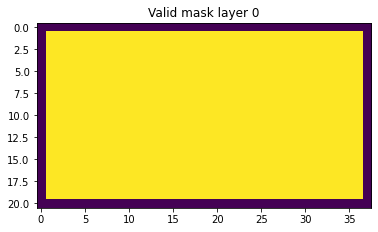

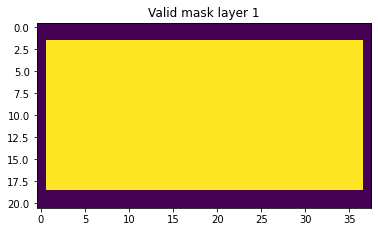

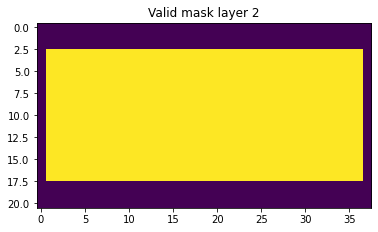

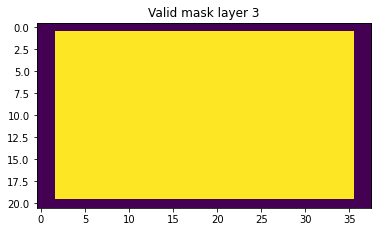

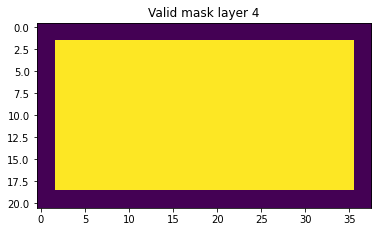

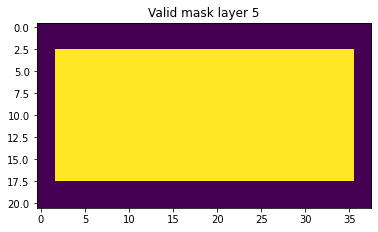

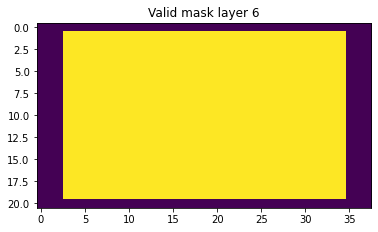

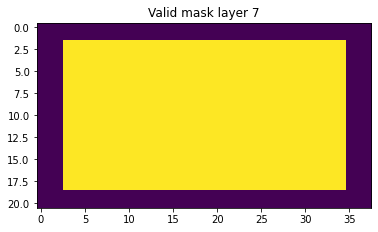

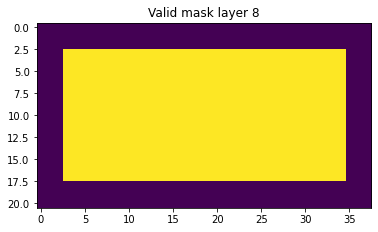

In [73]:
print(treadmills.valid_mask.shape)
    
for i in range(9):
    figure()
    imshow(treadmills.valid_mask[:,:,i], interpolation='nearest')
    title('Valid mask layer %d'%i)    

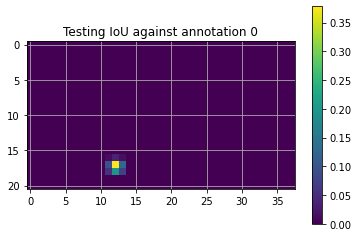

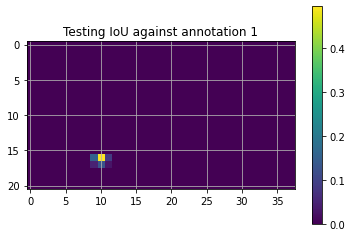

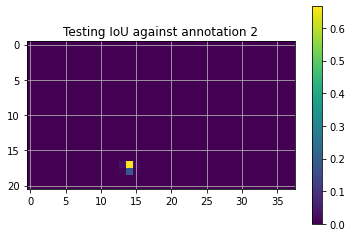

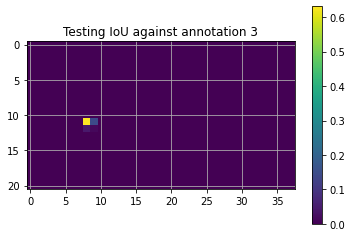

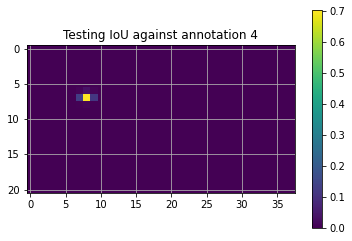

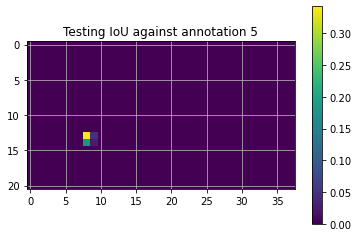

In [74]:
# Now let's check that the IoU calculation is doing something sane
annotations=[{'x': 406, 'y': 591, 'width': 57, 'height': 58}, 
             {'x': 334, 'y': 555, 'width': 54, 'height': 42}, 
             {'x': 471, 'y': 591, 'width': 36, 'height': 39}, 
             {'x': 276, 'y': 381, 'width': 38, 'height': 31}, 
             {'x': 269, 'y': 239, 'width': 50, 'height': 36}, 
             {'x': 275, 'y': 459, 'width': 30, 'height': 27}]   

IoUs = treadmills.ground_truth_IoU(annotations, treadmills.anchor_xx, treadmills.anchor_yy, 1, 1)

for i in range(len(annotations)):
    f=figure()
    imshow(IoUs[i])
    title('Testing IoU against annotation %d'%i)
    gca().grid(True)
    colorbar()